In [2]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
import pandas as pd

# leemos el dataset
data = pd.read_csv("emails.csv")

# mezclamos los datos y separamos 70% para entrenamiento y 30% para test
train, test = train_test_split(data, test_size=0.3, random_state=0)

# generamos conjuntos de validacion cruzada con k=5
kf = KFold(n_splits=5)

# inicializamos los clasificadores
gnb = GaussianNB()
mnb = MultinomialNB()

# inicializamos las listas para guardar los resultados
gnb_scores = []
mnb_scores = []

# iteramos sobre los conjuntos de validacion cruzada
for train_index, val_index in kf.split(train):
    # obtenemos los datos de entrenamiento y validacion
    train_data, val_data = train.iloc[train_index], train.iloc[val_index]
    # entrenamos los clasificadores con todas las columnas menos la primera (id) y ultima (prediccion)
    gnb.fit(train_data.iloc[:, 1:-1], train_data["Prediction"])
    mnb.fit(train_data.iloc[:, 1:-1], train_data["Prediction"])
    # predecimos los datos de validacion
    gnb_pred = gnb.predict(val_data.iloc[:, 1:-1])
    mnb_pred = mnb.predict(val_data.iloc[:, 1:-1])
    # calculamos la precision de los clasificadores
    gnb_score = accuracy_score(val_data["Prediction"], gnb_pred)
    mnb_score = accuracy_score(val_data["Prediction"], mnb_pred)
    # guardamos los resultados
    gnb_scores.append(gnb_score)
    mnb_scores.append(mnb_score)

# calculamos la precision promedio de los clasificadores
gnb_avg_score = sum(gnb_scores) / len(gnb_scores)
mnb_avg_score = sum(mnb_scores) / len(mnb_scores)

# imprimimos los resultados en una tabla
table = PrettyTable()
table.field_names = ["Clasificador", "Pliegue", "Precisión"]
for i in range(len(gnb_scores)):
    table.add_row(["GaussianNB", i, gnb_scores[i]])
table.add_row(["GaussianNB", "Promedio", gnb_avg_score])

for i in range(len(mnb_scores)):
    table.add_row(["MultinomialNB", i, mnb_scores[i]])
table.add_row(["MultinomialNB", "Promedio", mnb_avg_score])

print(table)

+---------------+----------+--------------------+
|  Clasificador | Pliegue  |     Precisión      |
+---------------+----------+--------------------+
|   GaussianNB  |    0     | 0.9475138121546961 |
|   GaussianNB  |    1     | 0.9571823204419889 |
|   GaussianNB  |    2     | 0.9502762430939227 |
|   GaussianNB  |    3     | 0.9516574585635359 |
|   GaussianNB  |    4     | 0.9447513812154696 |
|   GaussianNB  | Promedio | 0.9502762430939227 |
| MultinomialNB |    0     | 0.9516574585635359 |
| MultinomialNB |    1     | 0.9447513812154696 |
| MultinomialNB |    2     | 0.9433701657458563 |
| MultinomialNB |    3     | 0.9461325966850829 |
| MultinomialNB |    4     | 0.9433701657458563 |
| MultinomialNB | Promedio | 0.9458563535911602 |
+---------------+----------+--------------------+


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



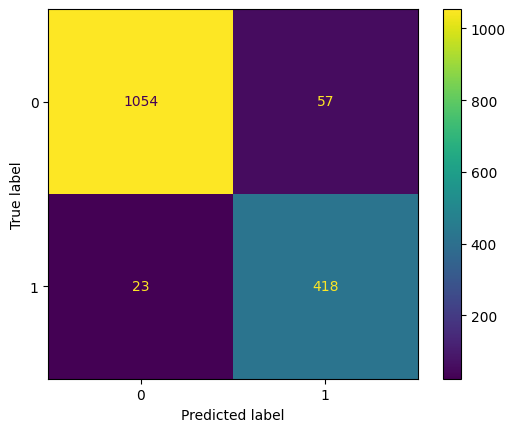

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtenemos la matriz de confusión de GaussianNB
train_data, val_data = train, test

# Entrenamos con todas las columnas excepto Prediction
gnb.fit(train_data.iloc[:, 1:-1], train_data["Prediction"])

# Predecimos los datos de test
gnb_pred = gnb.predict(val_data.iloc[:, 1:-1])

# Imprimimos el reporte de clasificación
print(classification_report(val_data["Prediction"], gnb_pred))

cm = confusion_matrix(val_data["Prediction"], gnb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

In [4]:
# Calculamos el accuracy y lo mostramos en una tabla junto con el tipo de distribucion
table = PrettyTable()
accuracy = accuracy_score(val_data["Prediction"], gnb_pred)
table.field_names = ["Clasificador", "Precisión", "Distribución"]
table.add_row(["GaussianNB", accuracy, "Normal"])

print(table)

+--------------+--------------------+--------------+
| Clasificador |     Precisión      | Distribución |
+--------------+--------------------+--------------+
|  GaussianNB  | 0.9484536082474226 |    Normal    |
+--------------+--------------------+--------------+


# Vecinos cercanos

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import pandas as pd

# leemos el dataset
data = pd.read_csv("emails.csv")

# mezclamos los datos y separamos 70% para entrenamiento y 30% para test
train, test = train_test_split(data, test_size=0.3, random_state=0)

# generamos conjuntos de validacion cruzada con k=3
kf = KFold(n_splits=3)

# inicializamos el clasificador
knn_uniform = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_one = KNeighborsClassifier(n_neighbors=1)

# inicializamos las listas para guardar los resultados
uniform_scores = []
distance_scores = []
one_scores = []

# iteramos sobre los conjuntos de validacion cruzada
for train_index, test_index in kf.split(train):
    # obtenemos los datos de entrenamiento y validacion
    train_data, val_data = train.iloc[train_index], train.iloc[test_index]
    # entrenamos el clasificador con todas las columnas menos la primera (id) y ultima (prediccion)
    knn_uniform.fit(train_data.iloc[:, 1:-1], train_data["Prediction"])
    knn_distance.fit(train_data.iloc[:, 1:-1], train_data["Prediction"])
    knn_one.fit(train_data.iloc[:, 1:-1], train_data["Prediction"])
    # predecimos los datos de validacion
    uniform_pred = knn_uniform.predict(val_data.iloc[:, 1:-1])
    distance_pred = knn_distance.predict(val_data.iloc[:, 1:-1])
    one_pred = knn_one.predict(val_data.iloc[:, 1:-1])
    # calculamos la precision del clasificador
    uniform_score = accuracy_score(val_data["Prediction"], uniform_pred)
    distance_score = accuracy_score(val_data["Prediction"], distance_pred)
    one_score = accuracy_score(val_data["Prediction"], one_pred)
    # guardamos los resultados
    uniform_scores.append(uniform_score)
    distance_scores.append(distance_score)
    one_scores.append(one_score)

# calculamos la precision promedio del clasificador
uniform_avg_score = sum(uniform_scores) / len(uniform_scores)
distance_avg_score = sum(distance_scores) / len(distance_scores)
one_avg_score = sum(one_scores) / len(one_scores)

# imprimimos los resultados en una tabla
table = PrettyTable()
table.field_names = ['Vecinos', 'Pesos', 'Pliegue', 'Accuracy']
for i in range(len(one_scores)):
    table.add_row([1, 'uniform', i, one_scores[i]])
table.add_row([1, 'uniform', 'Promedio', one_avg_score])

table.add_row(['-', '-', '-', '-'])

for i in range(len(uniform_scores)):
    table.add_row([10, 'uniform', i, uniform_scores[i]])
table.add_row([10, 'uniform', 'Promedio', uniform_avg_score])

table.add_row(['-', '-', '-', '-'])

for i in range(len(distance_scores)):
    table.add_row([10, 'distance', i, distance_scores[i]])
table.add_row([10, 'distance', 'Promedio', distance_avg_score])

print(table)

+---------+----------+----------+--------------------+
| Vecinos |  Pesos   | Pliegue  |      Accuracy      |
+---------+----------+----------+--------------------+
|    1    | uniform  |    0     | 0.8566694283347142 |
|    1    | uniform  |    1     | 0.8376139188069595 |
|    1    | uniform  |    2     | 0.8482587064676617 |
|    1    | uniform  | Promedio | 0.8475140178697784 |
|    -    |    -     |    -     |         -          |
|    10   | uniform  |    0     | 0.875724937862469  |
|    10   | uniform  |    1     | 0.8475559237779619 |
|    10   | uniform  |    2     | 0.8606965174129353 |
|    10   | uniform  | Promedio | 0.8613257930177888 |
|    -    |    -     |    -     |         -          |
|    10   | distance |    0     | 0.8765534382767192 |
|    10   | distance |    1     | 0.8492129246064622 |
|    10   | distance |    2     | 0.8698175787728026 |
|    10   | distance | Promedio | 0.8651946472186612 |
+---------+----------+----------+--------------------+


Resultados de pruebas finales de ambos algoritmos

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1111
           1       0.74      0.83      0.78       441

    accuracy                           0.87      1552
   macro avg       0.83      0.85      0.84      1552
weighted avg       0.87      0.87      0.87      1552



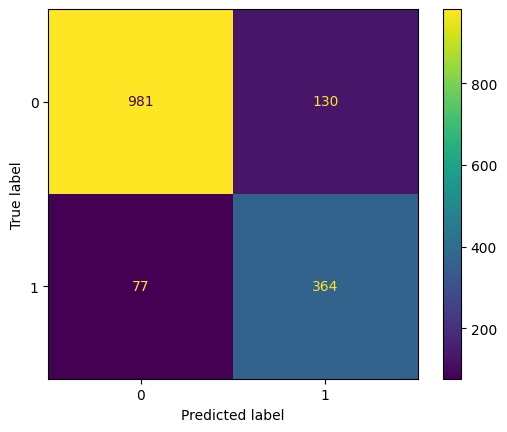

+--------------+---------+---------+--------------+--------------------+
| Clasificador | Vecinos |  Pesos  | Distribucion |      Accuracy      |
+--------------+---------+---------+--------------+--------------------+
|  GaussianNB  |    -    |    -    |    Normal    | 0.9484536082474226 |
|  KNeighbors  |    10   | uniform |   Uniform    | 0.8666237113402062 |
+--------------+---------+---------+--------------+--------------------+


In [7]:
# Entrenamos el uniform con todo el dataset de entrenamiento
knn_distance.fit(train.iloc[:, 1:-1], train["Prediction"])

# Predecimos los datos de test
uniform_pred = knn_distance.predict(test.iloc[:, 1:-1])

# calculamos la precision del clasificador
uniform_score = accuracy_score(test["Prediction"], uniform_pred)

# Imprimimos el reporte de clasificación
print(classification_report(test["Prediction"], uniform_pred))

cm = confusion_matrix(test["Prediction"], uniform_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

# comparamos los resultados entre gaussianNB y knn_uniform.
table = PrettyTable()
table.field_names = ['Clasificador', 'Vecinos', 'Pesos', 'Distribucion','Accuracy']
table.add_row(['GaussianNB', '-', '-', 'Normal', accuracy])
table.add_row(['KNeighbors', 10, 'distance', 'Distance', uniform_score])
print(table)